In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np

In [5]:
m1=pd.read_csv('jobs_400.csv')
m1.drop('Unnamed: 0',axis=1,inplace=True)

cleaning the dataset

In [6]:
m1.isna().sum()
m1.drop_duplicates()
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_id       400 non-null    object
 1   Company      400 non-null    object
 2   Designation  400 non-null    object
 3   Location     400 non-null    object
 4   company_id   398 non-null    object
 5   details_id   400 non-null    object
 6   No_of_Emp    397 non-null    object
 7   Followers    397 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [7]:
m1['Followers']=m1['Followers'].str.replace(' followers', '')
m1['No_of_Emp']=m1['No_of_Emp'].str.replace(' employees', '')
m1['No_of_Emp']=m1['No_of_Emp'].str.replace('+', '')
m1['No_of_Emp']=m1['No_of_Emp'].fillna(0)
m1['No_of_Emp']=m1['No_of_Emp'].str.replace(',', '')
m1['No_of_Emp']=m1['No_of_Emp'].apply(lambda x: sum(map(int, x.split('-'))) // 2 if not isinstance(x, float) else 0)
m1['Followers']=m1['Followers'].str.replace(',', '')

In [8]:
m1['Followers']=m1['Followers'].fillna(0).astype(int)

performing the preprocessing step by using StandardScaler by selecting ['Followers', 'No_of_Emp','Company'] these columns from the above dataset and naming it as 'm2' and clustering by using Kmeans(we are dealing with unsupervised data).

In [30]:
m2=m1[['Followers', 'No_of_Emp','Company']]
num=m2.select_dtypes(include=np.number).columns.tolist()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(m2[num])
m2[num]=scaler.transform(m2[num])
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6,random_state=42)
k1means=kmeans.fit_predict(m2[num])
cluster_labels = kmeans.labels_
m2['Class'] = ['Class{}'.format(label+1) for label in cluster_labels]

C:\Users\HP\AppData\Local\Temp\ipykernel_4672\1049915894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2[num]=scaler.transform(m2[num])
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_4672\1049915894

In [33]:
m2

,Followers,No_of_Emp,Company,Class
0,-0.621687,-2.233476,Fifth Column,Class1
1,-0.620643,-2.170461,RADIANT,Class1
2,-0.389706,0.411032,Jio,Class2
3,-0.574132,-2.170461,Hyqoo,Class1
4,-0.387843,0.411032,Dr. Reddy's Laboratories,Class2
...,...,...,...,...
395,-0.620454,-2.233476,Upstox,Class1
396,-0.613655,-2.170461,Emerson,Class1
397,-0.613678,-1.839500,Accenture in India,Class1
398,-0.525093,0.411032,Birlasoft,Class2


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

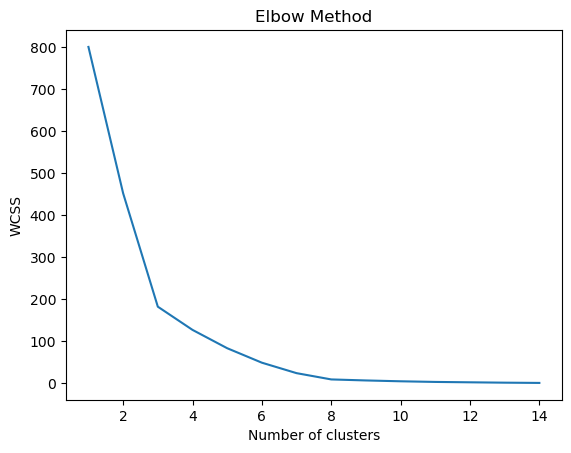

In [22]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(m2[num])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

# Assuming 'data' is your dataset
labels = kmeans.labels_
silhouette_avg = silhouette_score(m2[num], labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6620459910200954


In [26]:
m3=m2.drop('Company',axis=1,inplace=True)
d1=pd.read_csv('combine_1.csv')
Z1=pd.concat([d1,m2],axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_4672\3905195762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m3=m2.drop('Company',axis=1,inplace=True)


In [27]:
Z1

,Company,Job_skills,details_id,Involvement,Level,Total_Applicants,Industry,Followers,No_of_Emp,Class
0,Fifth Column,Architecture Revit,dt_1,Full-time,Mid-Senior level,63,Architecture and Planning,-0.621687,-2.233476,Class1
1,RADIANT,Economic Development Economic Indicators,dt_2,Full-time,Mid-Senior level,2,Architecture and Planning,-0.620643,-2.170461,Class1
2,Jio,Product Management Cybersecurity,dt_3,Full-time,Mid-Senior level,100,Telecommunications,-0.389706,0.411032,Class3
3,Hyqoo,Data Governance Business Tax Planning,dt_4,Full-time,Associate,100,IT Services and IT Consulting,-0.574132,-2.170461,Class1
4,Dr. Reddy's Laboratories,Business-to-Business (B2B) Market Access,dt_5,Full-time,Mid-Senior level,56,Pharmaceutical Manufacturing,-0.387843,0.411032,Class3
...,...,...,...,...,...,...,...,...,...,...
395,Upstox,JavaScript React.js,dt_396,Full-time,Mid-Senior level,56,IT Services and IT Consulting,-0.620454,-2.233476,Class1
396,Emerson,Regulatory Guidelines Documentation Practices,dt_397,Full-time,Mid-Senior level,11,IT Services and IT Consulting,-0.613655,-2.170461,Class1
397,Accenture in India,Communication Analytical Skills,dt_398,Full-time,Entry level,2,Pharmaceutical Manufacturing,-0.613678,-1.839500,Class1
398,Birlasoft,Resolving Issues RPG Free,dt_399,Full-time,Mid-Senior level,6,IT Services and IT Consulting,-0.525093,0.411032,Class3


In [28]:
dfs=Z1[['details_id','Company','Level','Total_Applicants','Industry','Class']]

In [29]:
dff=pd.read_csv('ffskills.csv')
dff

,Job_skills
0,"Architecture, Revit,"
1,"Economic Development, Economic Indicators,"
2,"Product Management, Cybersecurity"
3,"Data Governance, Business Tax Planning"
4,"Business-to-Business (B2B), Market Access,"
...,...
395,"JavaScript, React.js"
396,"Regulatory Guidelines, Documentation Practices,"
397,"Communication, Analytical Skills,"
398,"Resolving Issues, RPG Free,"


In [15]:
fdf=pd.concat([dff,dfs],axis=1)

In [17]:
final_d=fdf[['details_id','Company','Job_skills ','Level','Total_Applicants','Industry','Class']]

In [18]:
final_d

,details_id,Company,Job_skills,Level,Total_Applicants,Industry,Class
0,dt_1,Fifth Column,"Architecture, Revit,",Mid-Senior level,63,Architecture and Planning,Class1
1,dt_2,RADIANT,"Economic Development, Economic Indicators,",Mid-Senior level,2,Architecture and Planning,Class1
2,dt_3,Jio,"Product Management, Cybersecurity",Mid-Senior level,100,Telecommunications,Class2
3,dt_4,Hyqoo,"Data Governance, Business Tax Planning",Associate,100,IT Services and IT Consulting,Class1
4,dt_5,Dr. Reddy's Laboratories,"Business-to-Business (B2B), Market Access,",Mid-Senior level,56,Pharmaceutical Manufacturing,Class2
...,...,...,...,...,...,...,...
395,dt_396,Upstox,"JavaScript, React.js",Mid-Senior level,56,IT Services and IT Consulting,Class1
396,dt_397,Emerson,"Regulatory Guidelines, Documentation Practices,",Mid-Senior level,11,IT Services and IT Consulting,Class1
397,dt_398,Accenture in India,"Communication, Analytical Skills,",Entry level,2,Pharmaceutical Manufacturing,Class1
398,dt_399,Birlasoft,"Resolving Issues, RPG Free,",Mid-Senior level,6,IT Services and IT Consulting,Class2


In [19]:
final_d.to_csv('output.csv',index=False)
from IPython.display import FileLink
FileLink('output.csv')

C:\Users\HP\Downloads\output.csv

In [42]:
skill=pd.read_csv('JD.csv')
skill

,Unnamed: 0,Company,Job_Description
0,0,Fifth Column,About the job\nStudio Fifth Column is currentl...
1,1,RADIANT,About the job\nJob Description: Economic Devel...
2,2,Jio,About the job\nLocation- Navi Mumbai and Banga...
3,3,Hyqoo,About the job\nTitle - Data Analyst\nType - Co...
4,4,Dr. Reddy's Laboratories,About the job\nHiring for ABM (INDIVIDUAL ROLE...
...,...,...,...
252,252,Thomson Reuters,About the job\nDo you have experience in IT Se...
253,253,Infosys,About the job\nProposal Negotiation and Closur...
254,254,Tata Consultancy Services,About the job\nGreetings from TCS!\n\nJob Titl...
255,255,Ford Motor Solutions,"About the job\nDear Candidate,\n\nWe are looki..."


In [43]:
skill.drop_duplicates(subset='Job_Description ')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [44]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer(language='english')

def stem_tokens(tokens, stemmer):
    stemmed = [stemmer.stem(token) for token in tokens]
    return stemmed

def preprocess_text(job_description):
    tokens = word_tokenize(job_description)
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
    stemmed_tokens = stem_tokens(filtered_tokens, stemmer)
    tagged_tokens = nltk.pos_tag(filtered_tokens)
    skills = [word for word, pos in tagged_tokens if pos.startswith('NN')]
    return skills

# Apply preprocess_text function to job_description column
skill['noun_skills'] = skill['Job_Description '].apply(preprocess_text)

In [45]:
skill

,Unnamed: 0,Company,Job_Description,noun_skills
0,0,Fifth Column,About the job\nStudio Fifth Column is currentl...,"[job, studio, column, architects, designers, y..."
1,1,RADIANT,About the job\nJob Description: Economic Devel...,"[job, job, description, development, expert, q..."
2,2,Jio,About the job\nLocation- Navi Mumbai and Banga...,"[job, mumbai, bangalore, education, be/btech/m..."
3,3,Hyqoo,About the job\nTitle - Data Analyst\nType - Co...,"[job, data, analyst, type, contract, location,..."
4,4,Dr. Reddy's Laboratories,About the job\nHiring for ABM (INDIVIDUAL ROLE...,"[job, abm, role, chennai, therapy, .., require..."
...,...,...,...,...
252,252,Thomson Reuters,About the job\nDo you have experience in IT Se...,"[job, experience, services, chance, bring, exp..."
253,253,Infosys,About the job\nProposal Negotiation and Closur...,"[job, proposal, closure, account, review, acco..."
254,254,Tata Consultancy Services,About the job\nGreetings from TCS!\n\nJob Titl...,"[job, greetings, tcs, job, title, support, loc..."
255,255,Ford Motor Solutions,"About the job\nDear Candidate,\n\nWe are looki...","[job, candidate, candidate, communication, ski..."


In [46]:
skill['noun_skills']

0      [job, studio, column, architects, designers, y...
1      [job, job, description, development, expert, q...
2      [job, mumbai, bangalore, education, be/btech/m...
3      [job, data, analyst, type, contract, location,...
4      [job, abm, role, chennai, therapy, .., require...
                             ...                        
252    [job, experience, services, chance, bring, exp...
253    [job, proposal, closure, account, review, acco...
254    [job, greetings, tcs, job, title, support, loc...
255    [job, candidate, candidate, communication, ski...
256    [job, information, country, job, type, freelan...
Name: noun_skills, Length: 257, dtype: object